# Fake News Detection task - Augumentation - Back Translation
Advance Machine Learning **Project** - *A.Y. 2023/24*

**Team**:
*   **Mattia Piazzalunga** - 851931
*   **Nicolò Urbani** - 856213

**Beanchmark datasets**:

*   **WELFake dataset** - Verma et al.
*   **ISOT dataset** - Ahmed et al.

**Content**

Data augmentation on the WELFake Dataset using back translation, a data augmentation technique that translates text to another language and then back to the original language. French will be used as the target language.


##Main global variables & functions

In [ ]:
path_to_drive_folder = "/content/drive/MyDrive/Advanced_Machine_Learning"
file_name_ISOT_dataset_true = "dataset/ISOT_dataset_true.csv"
file_name_ISOT_dataset_fake = "dataset/ISOT_dataset_false.csv"
file_name_WELFake_dataset = "dataset/WELFake_dataset.csv"
file_slang_acronyms_abbreviations = "txt/slang_acronyms_abbreviations_fact_finder_ai.txt"
file_additional_stop_word="txt/additional_stop_words.txt"
file_name_GloVe="models/glove.twitter.27B.100d.txt"
file_name_model_lstm_WELFake="models/lstm_WELFake_augumented.h5"
file_name_model_bi_lstm_WELFake="models/bi_lstm_augumented.h5"
file_name_model_bert_WELFake="models/bert_augumented.h5"
file_name_model_basic_WELFake="models/basic_augumented.h5"

file_name_tokenized_basic_WELFake_dataset_with_lemmatization = "preprocessed_dataset/tokenized_basic_WELFake_dataset_with_lemmatization.csv"

file_name_preprocessed_WELFake_dataset_NO_stopword="preprocessed_dataset/preprocessed_WELFake_dataset_NO_stopword.csv"
file_name_preprocessed_ISOT_dataset_NO_stopword="preprocessed_dataset/preprocessed_ISOT_dataset_NO_stopword.csv"

file_name_preprocessed_back_translated_WELFake_dataset_NO_lemmatization = "preprocessed_dataset/preprocessed_back_translated_WELFake_dataset_NO_lemmatization"

file_name_preprocessed_WELFake_dataset_back_transaltion="preprocessed_dataset/preprocessed_WELFake_dataset_back_transaltion.csv"

file_name_tokenized_basic_back_translated_WELFake_dataset_with_lemmatization = "preprocessed_dataset/tokenized_basic_back_translated_WELFake_dataset_with_lemmatization"
file_name_augumented_WELFake_dataset_with_lemmatization = "preprocessed_dataset/file_name_augumented_WELFake_dataset_with_lemmatization"
additional_punctuation = {'“', '”', '‘', '’', '«', '»', '…', '–', '—', '・', '〈', '〉', '《', '》', '「', '」', '『', '』', '【', '】', '〔', '〕', '⁽', '⁾', '₍', '₎', 'ⁱ', 'ⁿ', '₊', '₋', '₌', '₍', '₎', '∙', '•', '⁃', '⁄', '⁑', '⁒', '⁓', '⁕', '⁖', '⁗', '⁘', '⁙', '⁚', '⁛', '⁜', '⁝', '⁞'}
embedding_size = 100
max_features_in_embedding_vector = 10000
max_number_of_words_in_a_comment = 200

In [ ]:
def plot_performance(history):
  fig, ax = plt.subplots(1, 2)
  fig.tight_layout()
  train_acc = history.history['accuracy']
  valid_acc = history.history['val_accuracy']
  train_loss = history.history['loss']
  valid_loss = history.history['val_loss']

  train_loss_color = '#80cbbf'
  valid_loss_color = '#329c8c'
  train_acc_color = '#80cbbf'
  valid_acc_color = '#329c8c'

  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Loss')
  ax[0].set_title('Loss')

  ax[0].plot(train_loss, label='Training Loss', color=train_loss_color)
  ax[0].plot(valid_loss, label='Validation Loss', color=valid_loss_color)
  ax[0].legend()

  ax[1].set_title('Accuracy')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Accuracy')

  ax[1].plot(train_acc, label='Training Accuracy', color=train_acc_color)
  ax[1].plot(valid_acc, label='Validation Accuracy', color=valid_acc_color)
  ax[1].legend()

  plt.show()

## Importing the libraries & data

### Downloading dependencies

In [ ]:
!pip install contractions
!pip install spylls
!pip install tensorflow
!pip install keras
!pip install inflect
!pip install -q -U tensorflow-text
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 7.6 MB/s eta 0:00:00


### Importing the libraries

In [ ]:
#OS
import os

#Basic Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import string
import seaborn as sns

#Pre-processing
import html
import pandas as pd
import string
import contractions
import re
import requests
import nltk
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from spylls.hunspell import Dictionary
from nltk.corpus import wordnet
from nltk.corpus import brown
from nltk.stem import WordNetLemmatizer
import inflect

#Keras
import keras
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Model, Sequential
from keras import layers
from keras.layers import Input, Dense
from keras import regularizers
from keras.models import load_model
from tensorflow.python.framework import ops

#TensofrFlow
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.compat.v1.keras import backend as K
import tensorflow.data as tf_data
from official.nlp import optimization
import tensorflow_hub as hub
import tensorflow_text as text

#LSTM
from keras.layers import Dense, Embedding, LSTM, Bidirectional

#Tokenizer
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer

#Sklearn
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

#Word cloud
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

### Other global variables

In [ ]:
wordnet_map = {"N":wordnet.NOUN,
               "V":wordnet.VERB,
               "J":wordnet.ADJ,
               "R":wordnet.ADV
              }
inflect_engine = inflect.engine()
punctuation = (string.punctuation) + ''.join(additional_punctuation)

###Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Set path to correct drive folder
os.chdir(path_to_drive_folder)

Mounted at /content/drive


### Loading useful dictionaries

In [ ]:
#Slan, acronyms and abbreviations dictionary
slang_acronyms_abbreviations = {}

with open(file_slang_acronyms_abbreviations, 'r') as file:
    for line in file:
        key, value = line.strip().split(':')
        slang_acronyms_abbreviations[key] = value

## Data Augumentation - Back Tarnslation

### Defining  Back Translating Function

In [ ]:
pip install argostranslate

In [ ]:
# Load Translating module

import argostranslate.package
import argostranslate.translate

## Download and install Argos Translate package From English to French
from_code = "en"
to_code = "fr"

argostranslate.package.update_package_index()
available_packages = argostranslate.package.get_available_packages()
package_to_install = next(
    filter(
        lambda x: x.from_code == from_code and x.to_code == to_code, available_packages
    )
)
argostranslate.package.install_from_path(package_to_install.download())


## Download and install Argos Translate packageFrom French to English

from_code = "fr"
to_code = "en"

argostranslate.package.update_package_index()
available_packages = argostranslate.package.get_available_packages()
package_to_install = next(
    filter(
        lambda x: x.from_code == from_code and x.to_code == to_code, available_packages
    )
)
argostranslate.package.install_from_path(package_to_install.download())

In [ ]:
# Back Translation Function
def back_translate(text):

    from_code = "en"
    to_code = "fr"

    #Break text in words
    re.sub(' +', ' ', text)
    words = text.split()

    # Select the first 100 words for each text
    words_200 = words[:100]

    # Join the selected words back into a single string
    text = ' '.join(words_200)

    #Translate to French
    translated_text = argostranslate.translate.translate(text, from_code, to_code)

    #Back Translate to English
    back_translated_text = argostranslate.translate.translate(translated_text, to_code, from_code)


    return back_translated_text


###Apply Back Translation Process

Back translation will be applied to the WELFake Dataset, which is partially preprocessed; punctuation and numbers are removed to avoid noise in the translation process. The translation process will use chunks to process the dataset step by step, with 100 sentences processed at a time. Checkpoints will be implemented to facilitate recovery in case of interruption.

In [ ]:
# Load Checkpoint from where to start
checkpoint_file = 'checkpoint.txt'
if os.path.exists(checkpoint_file):
    with open(checkpoint_file, 'r') as f:
        last_processed_index = int(f.read().strip())
else:
    last_processed_index = 0

# Load partially preprocessed dataset from the chechpoint till the end, it will be processed by chunk of size 100
dataset_to_be_processed = pd.read_csv(file_name_preprocessed_WELFake_dataset_NO_stopword, chunksize=100, skiprows=range(1, last_processed_index+1))

for i, chunk in enumerate(dataset_to_be_processed):

    #appli the back translation function to each chunk
    processed_column = chunk['text'].apply(lambda x: back_translate(x))

    # Replace the column with the processed one
    chunk['augmented_text'] = processed_column

    #Increment the checkpoint
    last_processed_index += len(chunk)

    #Save the back translated chunk of dataset
    chunk.to_csv(file_name_preprocessed_WELFake_dataset_back_transaltion, mode='a', header=(i==0), index=False)

    # Save checkpoint
    with open(checkpoint_file, 'w') as f:
        f.write(str(last_processed_index))


### Loading Back Translated Dataset

In [ ]:
#Saving WELFake Back Translated
back_translated_WELFake_dataset = pd.read_csv(file_name_preprocessed_WELFake_dataset_back_transaltion)

In [ ]:
back_translated_WELFake_dataset.head()

,label,text,augmented_text
0,1,law enforcement on high alert following threat...,The police on alert high alert following threa...
1,1,did they post their votes for hillary already,Have they already published their votes for Hi...
2,1,unbelievable obamas attorney general says most...,The Amazing Obamas Attorney General said that ...
3,0,bobby jindal raised hindu uses story of christ...,Bobby Jindal has raised Hindu Using the histor...
4,1,satan two russia unvelis an image of its terri...,Satan Two Russia Unvelis An image of its terri...


## Pre-Processing Back Translated Dataset

### Text cleaning, text normalization & noise removal

In [ ]:
#Remove cdata
def remove_cdata(text):
   pattern = re.compile(r'//\s*\<\s*\!\[cdata\[(.*?)//\s*\]\]', re.DOTALL)
   return re.sub(pattern, '', text)

#Remove urls
def remove_urls(text):
    return re.sub(r"https?://\S+|www\.\S+", "", text)

#Replace html entities
def replace_entities(text):
    return html.unescape(text)

#Remove html tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html5lib")
    return soup.get_text()

#Remove email
def remove_emails(text):
    text=re.sub(r'([a-zA-Z0-9_\-\.\*\(\)]+)@([a-zA-Z0-9_\-\.\*\(\)]+)\.([a-zA-Z]{0,5})', "", text)
    return text

#Remove mentions
def remove_mentions(text):
    pattern = re.compile(r"@\w+")
    text = re.sub(pattern, "", text)
    return text

#Remove special characters
def remove_special_characters(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Replace slang, acronyms, abbreviations & tanslation
def slang_acronyms_abbreviations_tanslation(text):
    keys_pattern = '|'.join(re.escape(key) for key in slang_acronyms_abbreviations.keys())
    slang_acronyms_abbreviations_pattern = re.compile(r'(?<!\w)(' + keys_pattern + r')(?!\w)')
    text = slang_acronyms_abbreviations_pattern.sub(lambda x: slang_acronyms_abbreviations[x.group()], text)
    return text

#Add space after punctuation
def space_after_punctuation(text):
    return re.sub(r'(?<=[.,;!?])\s*|(?<!\s)[.,;!?](?!\s)', r' ', text)

#Spelling correction
hunspell = Dictionary.from_files("en_US")

def correct_spelling(word):
    if hunspell.lookup(word):
        return word
    else:
        suggestions = list(hunspell.suggest(word))
        return suggestions[0] if suggestions else word

#Convert numbers to words
def convert_numbers_to_words(text):
  new_string=[]
  for word in text.split():
      if word.isdigit():
          temp = inflect_engine.number_to_words(word)
          new_string.append(temp)
      else:
          new_string.append(word)

  return ' '.join(new_string)

#Preprocessing of the entire dataset
def preprocessing_of_entire_dataset(dataset):

  #Transform everything "toLowerCase"
  dataset = dataset.applymap(lambda x: x.lower() if isinstance(x, str) else x)

  #Drop NaN and merge title and text columns
  dataset = dataset.replace("nan", np.nan)
  dataset= dataset[dataset['text'].notna()]
  dataset= dataset[dataset['augmented_text'].notna()]

  # Make Back Translated Dataset Compatible with Regular WELFake Dataset
  dataset = dataset.drop('text', axis=1)
  dataset= dataset.rename(columns={'augmented_text': 'text'})

  #Reset index
  dataset = dataset.reset_index(drop=True)

  return dataset

def process_text(text, with_spelling_correction = False):
  #Remove spaces before and after the strings
  text = text.strip()

  #Turn muliple spaces into one
  text = ' '.join(text.split())

  #Remove cdata from the text
  text = remove_cdata(text)

  #Remove urls from the text
  text = remove_urls(text)

  #Replace html entities from the text
  text = replace_entities(text)

  #Remove html tags from the text
  text = remove_html_tags(text)

  #Remove emails from the text
  text = remove_emails(text)

  #Remove mentions from the text
  text = remove_mentions(text)

  #Remove special characters from the text
  text = remove_special_characters(text)

  #Replace slang, acronyms, abbreviations & tanslation
  text = slang_acronyms_abbreviations_tanslation(text)

  #Expand the contractions
  text = contractions.fix(str(text))

  #Add space after punctuation
  text = space_after_punctuation(text)

  #Remove all punctuation marks from all columns
  text = text.translate(str.maketrans("", "", punctuation))

  #Turn muliple spaces into one
  text = ' '.join(text.split())

  #Spelling correction of the text
  if(with_spelling_correction):
    text = ' '.join(correct_spelling(word) for word in text.split())

  #Convert numbers to words
  text = convert_numbers_to_words(text)

  return text

#Preprocess the single text
def efficient_preprocessing(dataset, column_name):
    dataset[column_name] = dataset[column_name].apply(process_text)
    return dataset

In [ ]:
#Complex & Complete preprocessing of the WELFake Back Translated dataset
%%time
preprocessed_back_translated_WELFake_dataset = preprocessing_of_entire_dataset(back_translated_WELFake_dataset)
preprocessed_back_translated_WELFake_dataset = efficient_preprocessing(preprocessed_back_translated_WELFake_dataset, "text")

CPU times: user 36.1 s, sys: 101 ms, total: 36.2 s
Wall time: 36.4 s


In [ ]:
#Print dataset WELFake Back Translated
preprocessed_back_translated_WELFake_dataset.head()

,label,text
0,1,the police on alert high alert following threa...
1,1,have they already published their votes for hi...
2,1,the amazing obamas attorney general said that ...
3,0,bobby jindal has raised hindu using the histor...
4,1,satan two russia unvelis an image of its terri...


### Stop-Words Removal

In [ ]:
#Load additional stop words
with open(file_additional_stop_word, 'r') as file:
    stopwords_list = file.read()
additional_stopwords = stopwords_list.splitlines()

In [ ]:
#Stop-Words removal function
stop_words = set(stopwords.words('english'))
stop_words.update(additional_stopwords)
def remove_stop_words(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [ ]:
#WELFake without stop-words
%%time
preprocessed_back_translated_WELFake_dataset["text"] = preprocessed_back_translated_WELFake_dataset["text"].apply(remove_stop_words)

CPU times: user 630 ms, sys: 4.07 ms, total: 634 ms
Wall time: 639 ms


In [ ]:
#If any field becomes NaN after removing stop words it is removed.
preprocessed_WELFake_dataset=preprocessed_back_translated_WELFake_dataset[preprocessed_back_translated_WELFake_dataset['text'].notna()]


In [ ]:
#Print dataset WELFake
preprocessed_WELFake_dataset.head()

,label,text
0,1,police alert alert threats cops whites video 9...
1,1,published votes hillary
2,1,amazing obamas attorney charlottes rioters pea...
3,0,bobby jindal raised hindu history christian co...
4,1,satan russia unvelis image terrifying western ...


### POS and Lemmatizer

In [ ]:
train_sents = brown.tagged_sents(categories='news')
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)

#POS tagging
def pos_tag(text, pos_tag_type="pos_tag"):
    pos_tagged_text = t2.tag(text)
    pos_tagged_text = [(word, wordnet_map.get(pos_tag[0])) if pos_tag[0] in wordnet_map.keys() else (word, wordnet.NOUN) for (word, pos_tag) in pos_tagged_text]
    return pos_tagged_text

#Lemmatizer for single word
def lemmatize_word(text):
    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

#Lemmatizer with POS
def lemmatizer_with_POS(dataframe, column_pos_tag="pos_tag", column_lemmatized="lemmatized"):
  lemmatizer = WordNetLemmatizer()

  dataframe[column_lemmatized] = dataframe[column_pos_tag].apply(lambda x: lemmatize_word(x))
  dataframe[column_lemmatized] = [' '.join(map(str, l)) for l in dataframe[column_lemmatized]] # join back to text
  return dataframe

###Removing generated NaN

In [ ]:
#Removing generated NaN - WELFake
preprocessed_back_translated_WELFake_dataset = preprocessed_back_translated_WELFake_dataset.replace('', pd.NA).dropna()

### Saving of pre-processed datasets

In [ ]:
#Saving WELFake preprocessed
preprocessed_back_translated_WELFake_dataset.to_csv(file_name_preprocessed_back_translated_WELFake_dataset_NO_lemmatization,  index=False)

### Loading of pre-processed datasets

In [ ]:
#Loading WELFake preprocessed
preprocessed_back_translated_WELFake_dataset = pd.read_csv(file_name_preprocessed_back_translated_WELFake_dataset_NO_lemmatization)

##Base tokenization

###Tokenization of the datastes

In [ ]:
#Basic tokenizer
def basic_tokenizer(old_dataframe, column="text"):
  old_dataframe['tokenized'] = old_dataframe[column].astype(str).apply(word_tokenize)
  return old_dataframe

In [ ]:
%%time
#Basic tokenization of WELFake with lemmatization
preprocessed_back_translated_WELFake_dataset=basic_tokenizer(preprocessed_back_translated_WELFake_dataset)

CPU times: user 9.48 s, sys: 54.9 ms, total: 9.53 s
Wall time: 9.67 s


In [ ]:
#Print dataset WELFake
preprocessed_back_translated_WELFake_dataset.head()

,label,text,tokenized
0,1,police alert alert threats cops whites video 9...,"[police, alert, alert, threats, cops, whites, ..."
1,1,published votes hillary,"[published, votes, hillary]"
2,1,amazing obamas attorney charlottes rioters pea...,"[amazing, obamas, attorney, charlottes, rioter..."
3,0,bobby jindal raised hindu history christian co...,"[bobby, jindal, raised, hindu, history, christ..."
4,1,satan russia unvelis image terrifying western ...,"[satan, russia, unvelis, image, terrifying, we..."


###Lemmatization of the datasets

In [ ]:
%%time
#Lemmatization of the WELFake
preprocessed_back_translated_WELFake_dataset['pos_tag'] = preprocessed_back_translated_WELFake_dataset['tokenized'].apply(lambda x: pos_tag(x))
preprocessed_back_translated_WELFake_dataset=lemmatizer_with_POS(preprocessed_back_translated_WELFake_dataset)

CPU times: user 11.9 s, sys: 146 ms, total: 12.1 s
Wall time: 12.1 s


In [ ]:
#Print dataset WELFake
preprocessed_back_translated_WELFake_dataset.head()

,label,text,tokenized,pos_tag,lemmatized
0,1,police alert alert threats cops whites video 9...,"[police, alert, alert, threats, cops, whites, ...","[(police, n), (alert, a), (alert, a), (threats...",police alert alert threat cop white video 911b...
1,1,published votes hillary,"[published, votes, hillary]","[(published, v), (votes, n), (hillary, n)]",publish vote hillary
2,1,amazing obamas attorney charlottes rioters pea...,"[amazing, obamas, attorney, charlottes, rioter...","[(amazing, a), (obamas, n), (attorney, n), (ch...",amazing obamas attorney charlotte rioter peace...
3,0,bobby jindal raised hindu history christian co...,"[bobby, jindal, raised, hindu, history, christ...","[(bobby, n), (jindal, n), (raised, v), (hindu,...",bobby jindal raise hindu history christian con...
4,1,satan russia unvelis image terrifying western ...,"[satan, russia, unvelis, image, terrifying, we...","[(satan, n), (russia, n), (unvelis, n), (image...",satan russia unvelis image terrifying western ...


###Saving of basic tokenized  Back Translated datasets with lemmatization

In [ ]:
#Saving WELFake tokenized with lemmatization
preprocessed_back_translated_WELFake_dataset.to_csv(file_name_tokenized_basic_back_translated_WELFake_dataset_with_lemmatization,  index=False)

###Loading of basic tokenized Back Translated datasets with lemmatization

In [ ]:
#Loading WELFake tokenized with lemmatization
preprocessed_back_translated_WELFake_dataset = pd.read_csv(file_name_tokenized_basic_back_translated_WELFake_dataset_with_lemmatization)

##Augumented Dataset Definition

###Loading of basic tokenized regular datasets with lemmatization

In [ ]:
#Loading WELFake tokenized with lemmatization
preprocessed_WELFake_dataset = pd.read_csv(file_name_tokenized_basic_WELFake_dataset_with_lemmatization)

In [ ]:
preprocessed_WELFake_dataset.head()

,label,text,tokenized,pos_tag,lemmatized
0,0,law enforcement alert threats cops whites 911b...,"['law', 'enforcement', 'alert', 'threats', 'co...","[('law', 'n'), ('enforcement', 'n'), ('alert',...",law enforcement alert threat cop white 911by b...
1,0,post votes hillary,"['post', 'votes', 'hillary']","[('post', 'n'), ('votes', 'n'), ('hillary', 'n')]",post vote hillary
2,0,unbelievable obamas attorney charlotte rioters...,"['unbelievable', 'obamas', 'attorney', 'charlo...","[('unbelievable', 'n'), ('obamas', 'n'), ('att...",unbelievable obamas attorney charlotte rioter ...
3,1,bobby jindal raised hindu story christian conv...,"['bobby', 'jindal', 'raised', 'hindu', 'story'...","[('bobby', 'n'), ('jindal', 'n'), ('raised', '...",bobby jindal raise hindu story christian conve...
4,0,satan russia unvelis image terrifying supernuk...,"['satan', 'russia', 'unvelis', 'image', 'terri...","[('satan', 'n'), ('russia', 'n'), ('unvelis', ...",satan russia unvelis image terrifying supernuk...


In [ ]:
preprocessed_back_translated_WELFake_dataset

,label,text,tokenized,pos_tag,lemmatized
0,1,police alert alert threats cops whites video 9...,"['police', 'alert', 'alert', 'threats', 'cops'...","[('police', 'n'), ('alert', 'a'), ('alert', 'a...",police alert alert threat cop white video 911b...
1,1,published votes hillary,"['published', 'votes', 'hillary']","[('published', 'v'), ('votes', 'n'), ('hillary...",publish vote hillary
2,1,amazing obamas attorney charlottes rioters pea...,"['amazing', 'obamas', 'attorney', 'charlottes'...","[('amazing', 'a'), ('obamas', 'n'), ('attorney...",amazing obamas attorney charlotte rioter peace...
3,0,bobby jindal raised hindu history christian co...,"['bobby', 'jindal', 'raised', 'hindu', 'histor...","[('bobby', 'n'), ('jindal', 'n'), ('raised', '...",bobby jindal raise hindu history christian con...
4,1,satan russia unvelis image terrifying western ...,"['satan', 'russia', 'unvelis', 'image', 'terri...","[('satan', 'n'), ('russia', 'n'), ('unvelis', ...",satan russia unvelis image terrifying western ...
...,...,...,...,...,...
40578,0,catalan cabinet supreme court madrid reuters c...,"['catalan', 'cabinet', 'supreme', 'court', 'ma...","[('catalan', 'n'), ('cabinet', 'n'), ('supreme...",catalan cabinet supreme court madrid reuters c...
40579,1,croupier threatens montel williams publicly hu...,"['croupier', 'threatens', 'montel', 'williams'...","[('croupier', 'n'), ('threatens', 'n'), ('mont...",croupier threatens montel williams publicly hu...
40580,0,vote week nonnuclear sanctions iran week washt...,"['vote', 'week', 'nonnuclear', 'sanctions', 'i...","[('vote', 'n'), ('week', 'n'), ('nonnuclear', ...",vote week nonnuclear sanction iran week washto...
40581,1,watching narrow artist takes knee raises fist ...,"['watching', 'narrow', 'artist', 'takes', 'kne...","[('watching', 'v'), ('narrow', 'a'), ('artist'...",watch narrow artist take knee raise fist sing ...


In [ ]:
 preprocessed_back_translated_WELFake_dataset =  preprocessed_back_translated_WELFake_dataset[ preprocessed_back_translated_WELFake_dataset['label'] != 'label']

### Split Train Test

In [ ]:
#Split WELFake dataset
X_train_WELFake, X_test_WELFake, y_train_WELFake, y_test_WELFake = train_test_split(
    preprocessed_WELFake_dataset["lemmatized"].astype(str),
    preprocessed_WELFake_dataset["label"],
    stratify=preprocessed_WELFake_dataset["label"],
    test_size=0.2,
    random_state=42)


### Dataset Combination

### Base Train Dataset

In [ ]:
preprocessed_WELFake_dataset_x = pd.DataFrame(X_train_WELFake, columns=['lemmatized'])
preprocessed_WELFake_dataset_y = pd.DataFrame(y_train_WELFake, columns=['label'])


combined_array=np.column_stack((preprocessed_WELFake_dataset_x , preprocessed_WELFake_dataset_y))

preprocessed_WELFake_dataset_train= pd.DataFrame(combined_array, columns = ['lemmatized','label'])

In [ ]:
preprocessed_WELFake_dataset_train

,lemmatized,label
0,beware communist socialist progressive congres...,0
1,trump humiliated whining refusing voter info v...,0
2,berlin united nation trump thursday evening br...,1
3,hilarious fox news greg gutfeld introduces spo...,0
4,trump nominate chatterjee powelson ferc white ...,1
...,...,...
57691,boehner ally downplay gop rift washington cnn ...,1
57692,fox news monopoly liberal murdoch son fire ore...,0
57693,san bernardino adult dead injure school murder...,0
57694,report obama intel official russia blackmail c...,1


#### Sample The Back Translated Dataset

In [ ]:
#Extract from the back translated dataset 17500 Fake News and 17500 Real News, which are in total 36000 more or less the hal of the dataset

sampled_back_translated_WELFake = preprocessed_back_translated_WELFake_dataset.groupby('label', group_keys=False).apply(lambda x: x.sample(n=15000, random_state=42))

In [ ]:
sampled_back_translated_WELFake['label'].value_counts()

0    15000
1    15000
Name: label, dtype: int64

In [ ]:
sampled_back_translated_WELFake_lemmatized = sampled_back_translated_WELFake[['lemmatized', 'label']]

In [ ]:
sampled_back_translated_WELFake

,label,text,tokenized,pos_tag,lemmatized
34839,0,agony digital tease york times breadcrumb fall...,"['agony', 'digital', 'tease', 'york', 'times',...","[('agony', 'n'), ('digital', 'n'), ('tease', '...",agony digital tease york time breadcrumb fall ...
11248,0,refusal sit post bitter republican debate bill...,"['refusal', 'sit', 'post', 'bitter', 'republic...","[('refusal', 'n'), ('sit', 'v'), ('post', 'n')...",refusal sit post bitter republican debate bill...
15009,0,report quoted donors event facto cruz alliance...,"['report', 'quoted', 'donors', 'event', 'facto...","[('report', 'n'), ('quoted', 'v'), ('donors', ...",report quote donor event facto cruz alliance r...
8433,0,donations donation lacrosse financial ground y...,"['donations', 'donation', 'lacrosse', 'financi...","[('donations', 'n'), ('donation', 'n'), ('lacr...",donation donation lacrosse financial ground yo...
40017,0,honourable senator expect sale pakistan f16 bl...,"['honourable', 'senator', 'expect', 'sale', 'p...","[('honourable', 'n'), ('senator', 'n'), ('expe...",honourable senator expect sale pakistan f16 bl...
...,...,...,...,...,...
39237,1,seattle mayor muslims follow law sharia offeri...,"['seattle', 'mayor', 'muslims', 'follow', 'law...","[('seattle', 'n'), ('mayor', 'n'), ('muslims',...",seattle mayor muslim follow law sharia offerin...
12388,1,women inform governor reproductive cycle sign ...,"['women', 'inform', 'governor', 'reproductive'...","[('women', 'n'), ('inform', 'v'), ('governor',...",woman inform governor reproductive cycle sign ...
19507,1,furious fbi agents talking clinton email searc...,"['furious', 'fbi', 'agents', 'talking', 'clint...","[('furious', 'n'), ('fbi', 'n'), ('agents', 'n...",furious fbi agent talk clinton email searched ...
36100,1,bingo judge napolitano emails weiners lead cli...,"['bingo', 'judge', 'napolitano', 'emails', 'we...","[('bingo', 'n'), ('judge', 'n'), ('napolitano'...",bingo judge napolitano email weiners lead clin...


#### Concatenation Train Set WELFake and Back Translated Sample

In [ ]:
augmented_WELFake_dataset_train = pd.concat([preprocessed_WELFake_dataset_train, sampled_back_translated_WELFake_lemmatized], ignore_index=True)

In [ ]:
augmented_WELFake_dataset_train['label'] = augmented_WELFake_dataset_train['label'].astype(int)

In [ ]:
augmented_WELFake_dataset_train['label'].value_counts()

0    44674
1    43022
Name: label, dtype: int64

###Saving basic tokenized Back Translated Train datasets with lemmatization


In [ ]:
#Saving WELFake tokenized with lemmatization
augmented_WELFake_dataset_train.to_csv(file_name_augumented_WELFake_dataset_with_lemmatization,  index=False)

###Loading of basic tokenized Back Translated Train datasets with lemmatization

In [ ]:
#Loading WELFake tokenized with lemmatization
augmented_WELFake_dataset_train = pd.read_csv(file_name_augumented_WELFake_dataset_with_lemmatization)

## Explorative Analysis

### Target variables distributions

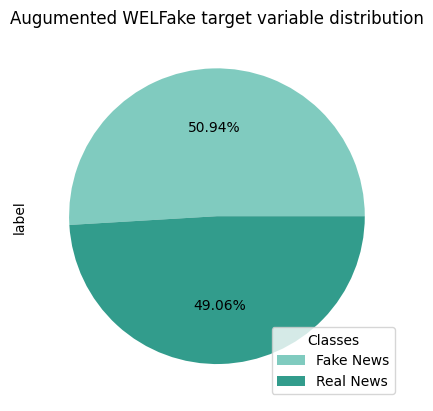

In [ ]:
#WELFake target variable distribution
labels = ["Fake News", "Real News"]
colors = ["#80cbbf", "#329c8c"]

augmented_WELFake_dataset_train['label'].value_counts().plot.pie(autopct='%.2f%%', labels=None, colors=colors, title="Augumented WELFake target variable distribution")

plt.legend(labels, title="Classes", loc="lower right")

### Real news vs Fake News - Length Comparation

Text(0.5, 1.0, 'Real news vs Fake News - WELFake length Comparation')

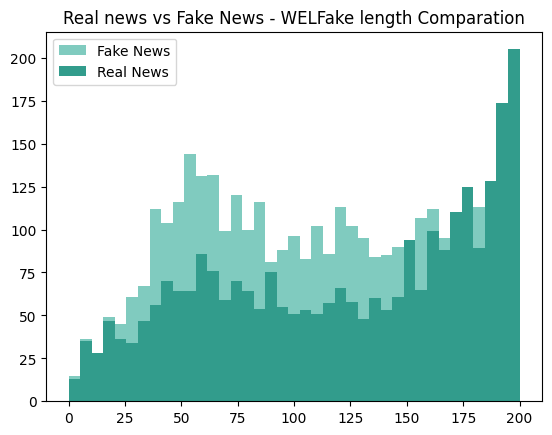

In [ ]:
#Real news vs Fake News - WELFake length Comparation
analysis_dataframe = pd.DataFrame()
analysis_dataframe["label"] =  augmented_WELFake_dataset_train["label"]
analysis_dataframe["text_length"] = augmented_WELFake_dataset_train["lemmatized"].apply(lambda x: len(str(x)) - str(x).count(" "))

bins = np.linspace(0, 200, 40)

plt.hist(analysis_dataframe[analysis_dataframe["label"]==0]["text_length"], bins, label="Fake News", color="#80cbbf")
plt.hist(analysis_dataframe[analysis_dataframe["label"]==1]["text_length"], bins, label="Real News", color="#329c8c")

plt.legend(loc="upper left")

plt.title('Real news vs Fake News - WELFake length Comparation')

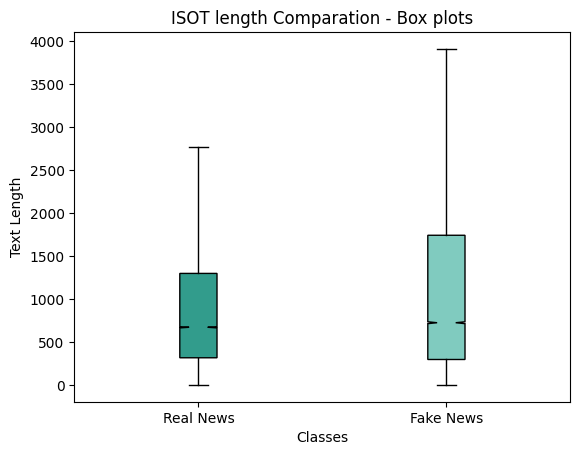

In [ ]:
#Real news vs Fake News - Augmente WELFake length Comparation
data = [analysis_dataframe[analysis_dataframe['label'] == label]['text_length'].values for label in analysis_dataframe['label'].unique()]

bplot = plt.boxplot(data, notch=True, vert=True, patch_artist=True, labels=['Real News', 'Fake News'], showfliers=False)

colors = ['#329c8c', '#80cbbf']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

for median_line in bplot['medians']:
    median_line.set_visible(False)

plt.title("ISOT length Comparation - Box plots")
plt.xlabel("Classes")
plt.grid(False)
plt.ylabel("Text Length")
plt.show()

###Most frequent words in Real News

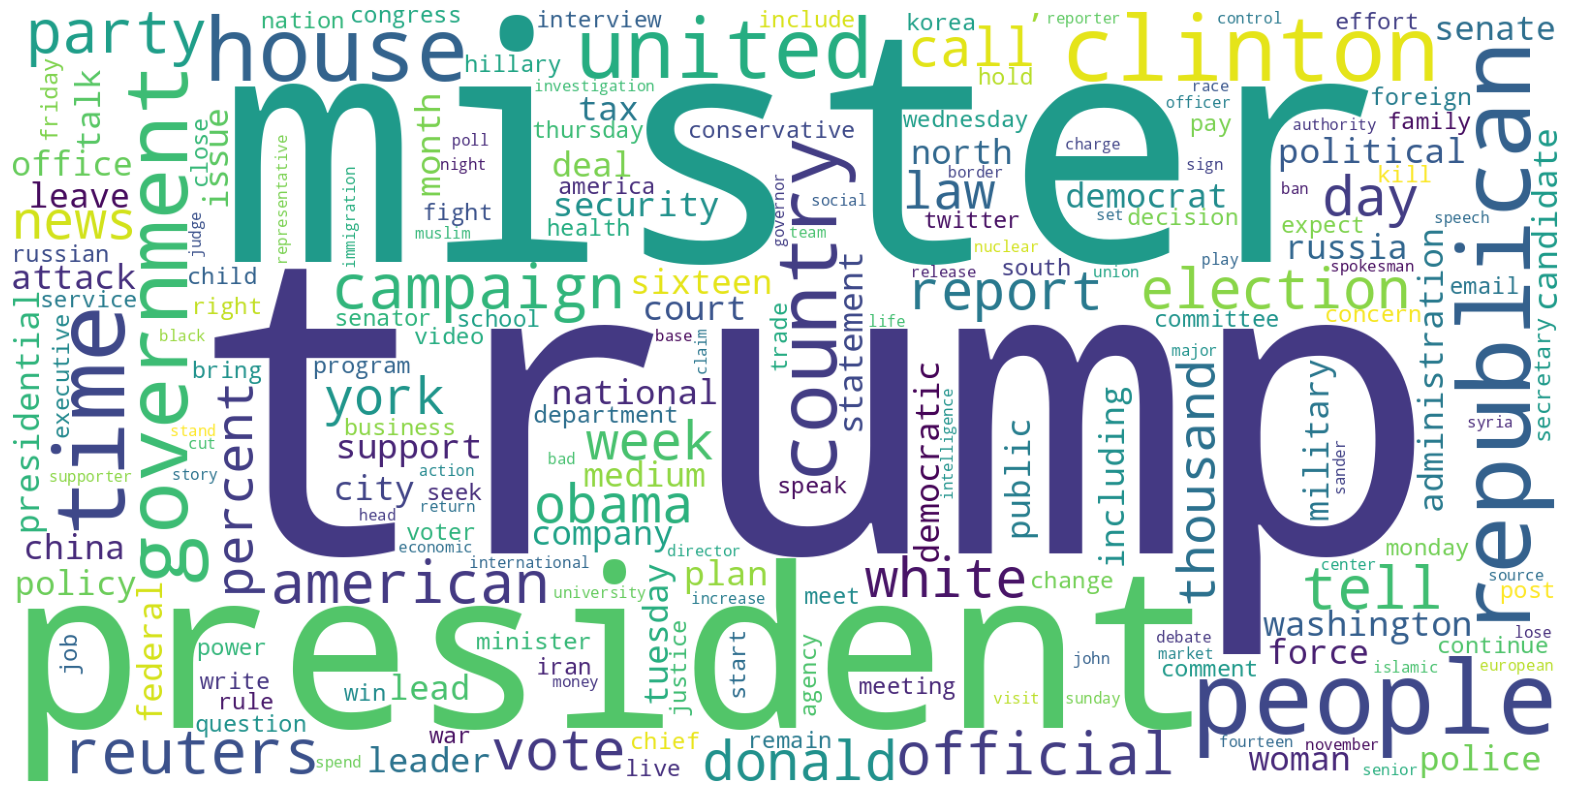

In [ ]:
#Most frequent words in Real News - WELFake
real = augmented_WELFake_dataset_train.loc[augmented_WELFake_dataset_train['label'] == 1]
real_tokens = [word_tokenize(str(sublist)) for sublist in real['lemmatized']]

real_words = [item for sublist in real_tokens for item in sublist]

fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(Counter(real_words))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

###Most frequent words in Fake News

> Blocco con rientro



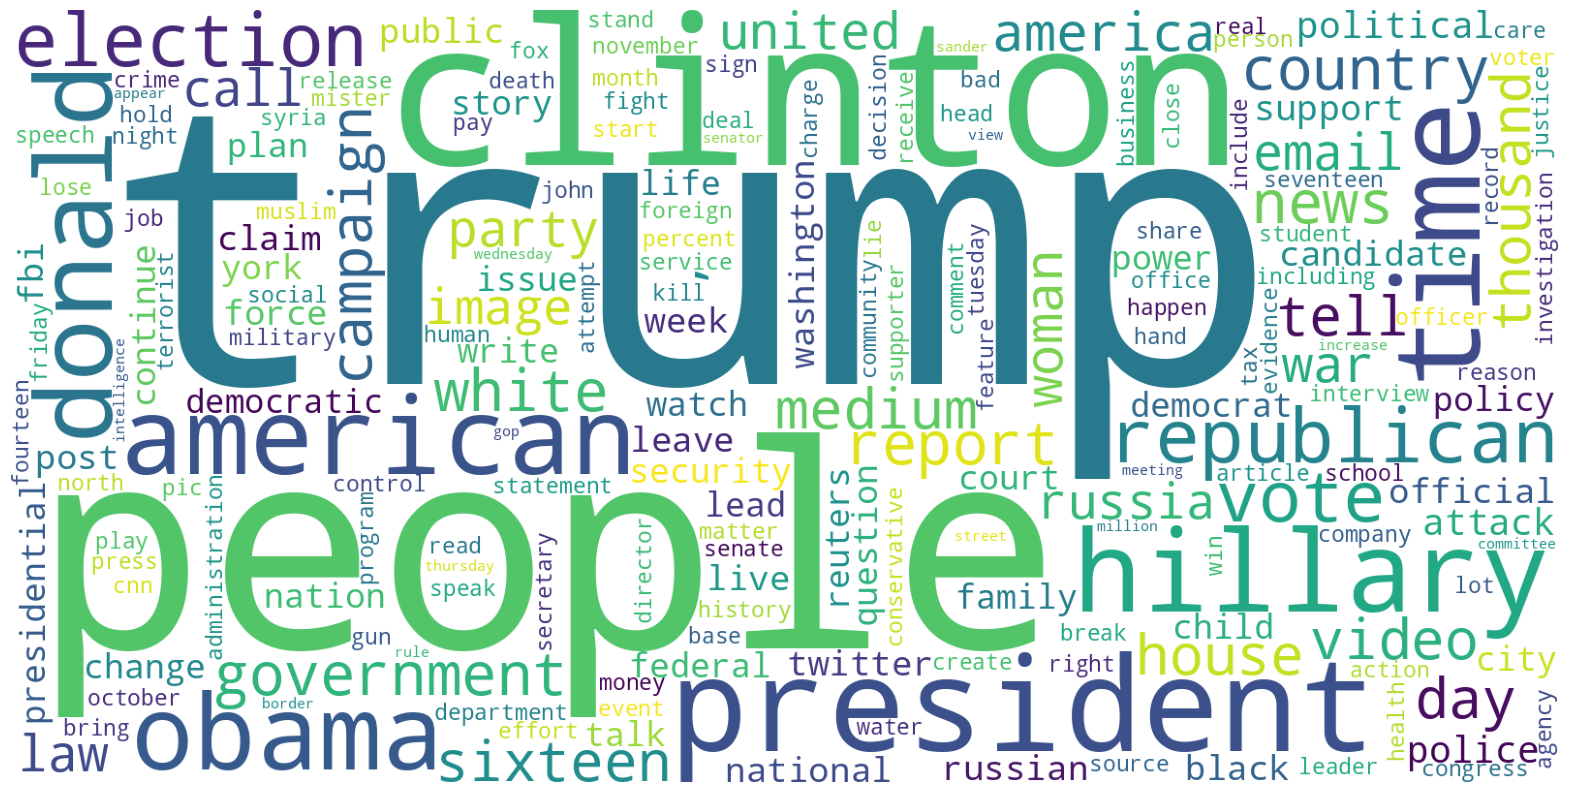

In [ ]:
#Most frequent words in Fake News - WELFake
real = augmented_WELFake_dataset_train.loc[augmented_WELFake_dataset_train['label'] == 0]
real_tokens = [word_tokenize(str(sublist)) for sublist in real['lemmatized']]

real_words = [item for sublist in real_tokens for item in sublist]

fig = plt.figure(figsize=(20,14))
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(Counter(real_words))
plt.axis("off")
plt.imshow(wordcloud, interpolation='antialiased')

## Models with GloVe

###Splits based on base tokenization

In [ ]:
#Split WELFake dataset
X_train_WELFake =  augmented_WELFake_dataset_train['lemmatized'].values

y_train_WELFake = augmented_WELFake_dataset_train['label'].values

X_train_WELFake, X_validation_WELFake, y_train_WELFake, y_validation_WELFake = train_test_split(
    X_train_WELFake, y_train_WELFake,
    stratify=y_train_WELFake,
    test_size=0.2,
    random_state=42
)

###Transform tokens to sequences

In [ ]:
%%time
#Tokens to sequence for WELFake
vectorizer_WELFake = layers.TextVectorization(max_tokens=max_features_in_embedding_vector, output_sequence_length=embedding_size)
text_ds = tf_data.Dataset.from_tensor_slices(X_train_WELFake).batch(128)
vectorizer_WELFake.adapt(text_ds)

vocabulary_WELFake = vectorizer_WELFake.get_vocabulary()
word_index_WELFake = dict(zip(vocabulary_WELFake, range(len(vocabulary_WELFake))))

CPU times: user 4.75 s, sys: 166 ms, total: 4.92 s
Wall time: 4.45 s


###Generate the embedding layer

In [ ]:
def embedding_layer_generator(vocabulary, word_index, embedding_size, file_name_GloVe):
  embeddings_index = {}
  with open(file_name_GloVe) as f:
      for line in f:
          word, coefs = line.split(maxsplit=1)
          coefs = np.fromstring(coefs, "f", sep=" ")
          embeddings_index[word] = coefs
  num_tokens = len(vocabulary) + 2

  embedding_matrix = np.zeros((num_tokens, embedding_size))
  for word, i in word_index.items():
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
          embedding_matrix[i] = embedding_vector

  embedding_layer = Embedding(
      num_tokens,
      embedding_size,
      trainable=False,
  )
  embedding_layer.build((1,))
  embedding_layer.set_weights([embedding_matrix])

  return embedding_layer

In [ ]:
%%time
#Generate the embeddings layer for WELFake
WELFake_embedding_layer=embedding_layer_generator(vocabulary_WELFake, word_index_WELFake, embedding_size, file_name_GloVe)

CPU times: user 26 s, sys: 1.53 s, total: 27.6 s
Wall time: 28.5 s


### Basic NN - Training models

In [ ]:
%%time
#Convert list-of-strings data to NumPy arrays of integer indices - WELFake
batch_size = 1000
X_train = []
for i in range(0, len(X_train_WELFake), batch_size):
    batch = X_train_WELFake[i:i+batch_size]
    X_train.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_train = np.concatenate(X_train, axis=0)

X_val = []
for i in range(0, len(X_validation_WELFake), batch_size):
    batch = X_validation_WELFake[i:i+batch_size]
    X_val.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_val = np.concatenate(X_val, axis=0)

X_test = []
for i in range(0, len(X_test_WELFake), batch_size):
    batch = X_test_WELFake[i:i+batch_size]
    X_test.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_test = np.concatenate(X_test, axis=0)

y_train =  np.array(y_train_WELFake)
y_val = np.array(y_validation_WELFake)
y_test = np.array(y_test_WELFake)

CPU times: user 14.2 s, sys: 1.4 s, total: 15.6 s
Wall time: 15.7 s


In [ ]:
#Creation of the basic model - WELFake
int_sequences_input = keras.Input(shape=(None,), dtype="int32")
embedded_sequences = WELFake_embedding_layer(int_sequences_input)
x = layers.Conv1D(64, 5, activation='relu')(embedded_sequences)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
preds = layers.Dense(1, activation='sigmoid')(x)

basic_model_WELFake = keras.Model(int_sequences_input, preds)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
basic_model_WELFake.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Summary of the basic model - WELFake
basic_model_WELFake.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 100)         1000200   
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                           

In [ ]:
%%time
#Basic model training - WELFake
history_WELFake = basic_model_WELFake.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
1097/1097 [==============================] - 7s 5ms/step - loss: 1.2223 - accuracy: 0.5018 - val_loss: 1.0377 - val_accuracy: 0.5489
Epoch 2/5
1097/1097 [==============================] - 6s 5ms/step - loss: 0.9583 - accuracy: 0.5267 - val_loss: 0.8734 - val_accuracy: 0.5893
Epoch 3/5
1097/1097 [==============================] - 5s 5ms/step - loss: 0.8309 - accuracy: 0.5576 - val_loss: 0.7829 - val_accuracy: 0.5874
Epoch 4/5
1097/1097 [==============================] - 6s 5ms/step - loss: 0.7600 - accuracy: 0.5779 - val_loss: 0.7251 - val_accuracy: 0.6041
Epoch 5/5
1097/1097 [==============================] - 5s 5ms/step - loss: 0.7142 - accuracy: 0.5964 - val_loss: 0.6841 - val_accuracy: 0.6169
CPU times: user 30.9 s, sys: 2.26 s, total: 33.2 s
Wall time: 28.7 s


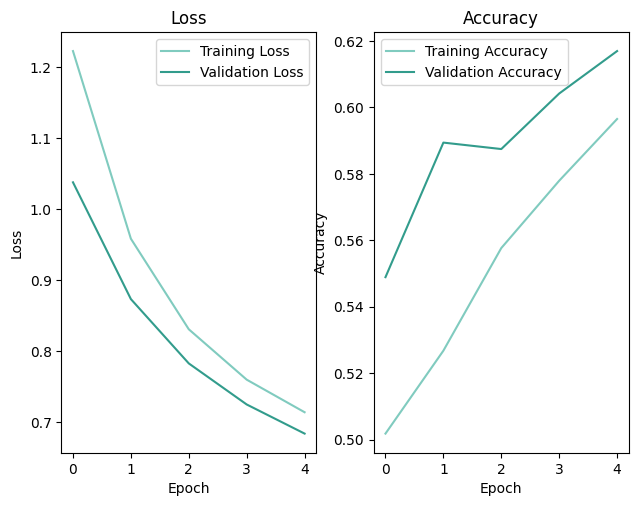

In [ ]:
#Plotting WELFake performance
plot_performance(history_WELFake)

451/451 [==============================] - 1s 2ms/step
Accuracy: 0.8279256794231836
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      7418
           1       0.85      0.78      0.81      7006

    accuracy                           0.83     14424
   macro avg       0.83      0.83      0.83     14424
weighted avg       0.83      0.83      0.83     14424

CPU times: user 1.26 s, sys: 131 ms, total: 1.39 s
Wall time: 1.54 s


<Axes: xlabel='Predicted', ylabel='Actual'>

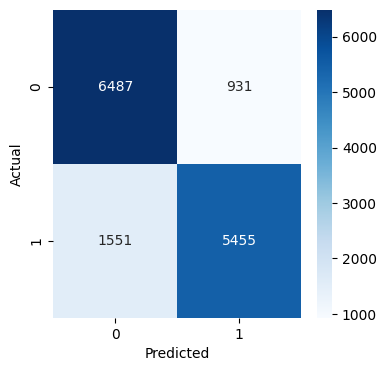

In [ ]:
%%time
#Plotting the performance on test set
y_pred = basic_model_WELFake.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

###Basic NN - Saving models

In [ ]:
#Saving model - WELFake
basic_model_WELFake.save(file_name_model_basic_WELFake)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Basic NN - Loading models


In [ ]:
#Loading model - WELFake
basic_model_WELFake = load_model(file_name_model_basic_WELFake, custom_objects=None, compile=True, safe_mode=True)

###LSTM - Training models

In [ ]:
%%time
#Convert list-of-strings data to NumPy arrays of integer indices - WELFake
batch_size = 1000
X_train = []
for i in range(0, len(X_train_WELFake), batch_size):
    batch = X_train_WELFake[i:i+batch_size]
    X_train.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_train = np.concatenate(X_train, axis=0)

X_val = []
for i in range(0, len(X_validation_WELFake), batch_size):
    batch = X_validation_WELFake[i:i+batch_size]
    X_val.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_val = np.concatenate(X_val, axis=0)

X_test = []
for i in range(0, len(X_test_WELFake), batch_size):
    batch = X_test_WELFake[i:i+batch_size]
    X_test.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_test = np.concatenate(X_test, axis=0)

y_train =  np.array(y_train_WELFake)
y_val = np.array(y_validation_WELFake)
y_test = np.array(y_test_WELFake)

In [ ]:
#Creation of the LSTM model - WELFake
int_sequences_input = keras.Input(shape=(None,), dtype="int32")
embedded_sequences = WELFake_embedding_layer(int_sequences_input)
x = layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
x = Dropout(0.2)(x)
preds = layers.Dense(1, activation='sigmoid')(x)

lstm_model_WELFake = keras.Model(int_sequences_input, preds)

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
lstm_model_WELFake.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
#Summary of the LSTM model - WELFake
lstm_model_WELFake.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 100)         1000200   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1017257 (3.88 MB)
Trainable params: 17057 (66.63 KB)
Non-trainable params: 1000200 (3.82 MB)
_________________________________________________________________


In [ ]:
%%time
#LSTM model training - WELFake
history_WELFake = lstm_model_WELFake.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
1097/1097 [==============================] - 351s 317ms/step - loss: 0.6664 - accuracy: 0.5647 - val_loss: 0.6017 - val_accuracy: 0.6499
Epoch 2/5
1097/1097 [==============================] - 482s 439ms/step - loss: 0.5980 - accuracy: 0.6977 - val_loss: 0.5659 - val_accuracy: 0.7322
Epoch 3/5
1097/1097 [==============================] - 361s 329ms/step - loss: 0.5718 - accuracy: 0.7271 - val_loss: 0.5555 - val_accuracy: 0.7396
Epoch 4/5
1097/1097 [==============================] - 325s 297ms/step - loss: 0.5748 - accuracy: 0.7248 - val_loss: 0.5860 - val_accuracy: 0.7195
Epoch 5/5
1097/1097 [==============================] - 326s 297ms/step - loss: 0.5629 - accuracy: 0.7325 - val_loss: 0.5466 - val_accuracy: 0.7454
CPU times: user 36min 32s, sys: 3min, total: 39min 33s
Wall time: 31min 25s


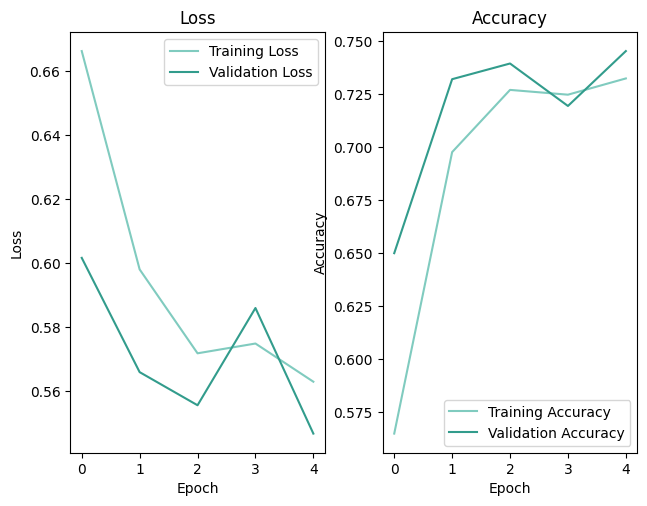

In [ ]:
#Plotting WELFake performance
plot_performance(history_WELFake)

451/451 [==============================] - 14s 30ms/step
Accuracy: 0.7530504714364947
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      7418
           1       0.78      0.68      0.73      7006

    accuracy                           0.75     14424
   macro avg       0.76      0.75      0.75     14424
weighted avg       0.76      0.75      0.75     14424

CPU times: user 13.9 s, sys: 232 ms, total: 14.2 s
Wall time: 20.9 s


<Axes: xlabel='Predicted', ylabel='Actual'>

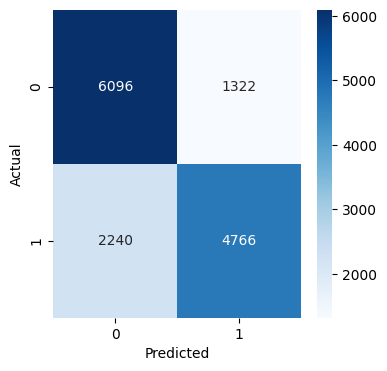

In [ ]:
%%time
#Plotting the performance on test set
y_pred = lstm_model_WELFake.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

###LSTM - Saving models

In [ ]:
#Saving model - WELFake
lstm_model_WELFake.save(file_name_model_lstm_WELFake)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###LSTM - Loading models

In [ ]:
#Loading model - WELFake
lstm_model_WELFake = load_model(file_name_model_lstm_WELFake, custom_objects=None, compile=True, safe_mode=True)

In [ ]:
np.savez('dataset_arrays.npz', X_train_WELFake=X_train_WELFake, y_train_WELFake=y_train_WELFake, X_validation_WELFake=X_validation_WELFake, y_validation_WELFake=y_validation_WELFake, X_test_WELFake=X_test_WELFake, y_test_WELFake=y_test_WELFake)

In [ ]:
# Load the saved .npz file
loaded_data = np.load('dataset_arrays.npz', allow_pickle=True)

# Extract arrays
X_train_WELFake = loaded_data['X_train_WELFake']
y_train_WELFake = loaded_data['y_train_WELFake']
X_validation_WELFake = loaded_data['X_validation_WELFake']
y_validation_WELFake= loaded_data['y_validation_WELFake']
X_test_WELFake = loaded_data['X_test_WELFake']
y_test_WELFake = loaded_data['y_test_WELFake']

###BI-LSTM - Training models



In [ ]:
%%time
#Convert list-of-strings data to NumPy arrays of integer indices - WELFake
batch_size = 1000
X_train = []
for i in range(0, len(X_train_WELFake), batch_size):
    batch = X_train_WELFake[i:i+batch_size]
    X_train.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_train = np.concatenate(X_train, axis=0)

X_val = []
for i in range(0, len(X_validation_WELFake), batch_size):
    batch = X_validation_WELFake[i:i+batch_size]
    X_val.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_val = np.concatenate(X_val, axis=0)

X_test = []
for i in range(0, len(X_test_WELFake), batch_size):
    batch = X_test_WELFake[i:i+batch_size]
    X_test.append(vectorizer_WELFake(np.array([[s] for s in batch])).numpy())
X_test = np.concatenate(X_test, axis=0)

y_train =  np.array(y_train_WELFake)
y_val = np.array(y_validation_WELFake)
y_test = np.array(y_test_WELFake)

CPU times: user 13.6 s, sys: 484 ms, total: 14.1 s
Wall time: 14.6 s


In [ ]:
#Creation of the BI-LSTM model - WELFake
int_sequences_input = keras.Input(shape=(None,), dtype="int32")
embedded_sequences = WELFake_embedding_layer(int_sequences_input)
x = layers.Bidirectional(LSTM(200, dropout=0.2, recurrent_dropout=0.2))(embedded_sequences)
preds = layers.Dense(1, activation='sigmoid')(x)

model_bilstm_WELFake = keras.Model(int_sequences_input, preds)

optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
model_bilstm_WELFake.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#aSummary of the BI-LSTM model - WELFake
model_bilstm_WELFake.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_1 (Embedding)     (None, None, 100)         1000200   
                                                                 
 bidirectional (Bidirection  (None, 400)               481600    
 al)                                                             
                                                                 
 dense_5 (Dense)             (None, 1)                 401       
                                                                 
Total params: 1482201 (5.65 MB)
Trainable params: 482001 (1.84 MB)
Non-trainable params: 1000200 (3.82 MB)
_________________________________________________________________


In [ ]:
%%time
#BI-LSTM model training - WELFake
history_WELFake = model_bilstm_WELFake.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
1097/1097 [==============================] - 667s 602ms/step - loss: 0.5898 - accuracy: 0.6647 - val_loss: 0.5453 - val_accuracy: 0.7096
Epoch 2/5
1097/1097 [==============================] - 636s 580ms/step - loss: 0.5284 - accuracy: 0.7399 - val_loss: 0.5012 - val_accuracy: 0.7625
Epoch 3/5
1097/1097 [==============================] - 634s 578ms/step - loss: 0.4995 - accuracy: 0.7615 - val_loss: 0.4814 - val_accuracy: 0.7625
Epoch 4/5
1097/1097 [==============================] - 633s 577ms/step - loss: 0.4468 - accuracy: 0.7912 - val_loss: 0.4233 - val_accuracy: 0.8083
Epoch 5/5
1097/1097 [==============================] - 631s 575ms/step - loss: 0.4132 - accuracy: 0.8102 - val_loss: 0.4109 - val_accuracy: 0.8072
CPU times: user 1h 13min 6s, sys: 6min 28s, total: 1h 19min 34s
Wall time: 53min 20s


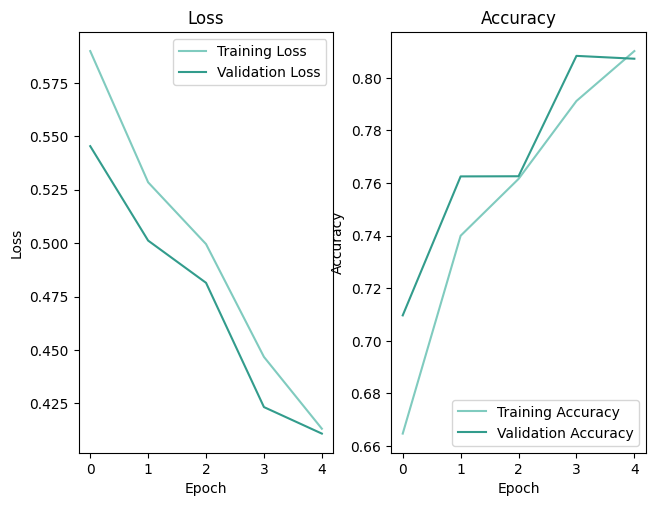

In [ ]:
#Plotting WELFake performance
plot_performance(history_WELFake)

451/451 [==============================] - 26s 56ms/step
Accuracy: 0.8381863560732113
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      7418
           1       0.87      0.79      0.83      7006

    accuracy                           0.84     14424
   macro avg       0.84      0.84      0.84     14424
weighted avg       0.84      0.84      0.84     14424

CPU times: user 25.7 s, sys: 317 ms, total: 26 s
Wall time: 41.5 s


<Axes: xlabel='Predicted', ylabel='Actual'>

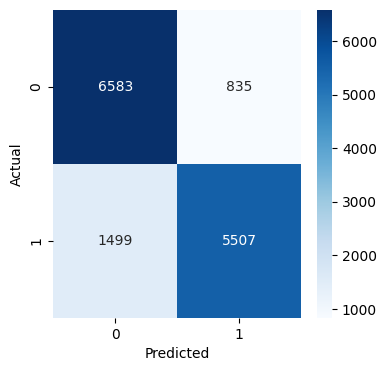

In [ ]:
%%time
#Plotting the performance on test set
y_pred = model_bilstm_WELFake.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

###BI-LSTM - Saving models

In [ ]:
#Saving model - WELFake
model_bilstm_WELFake.save(file_name_model_bi_lstm_WELFake)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###BI-LSTM - Loading models

In [ ]:
#Loading model - WELFake
model_bilstm_WELFake = load_model(file_name_model_bi_lstm_WELFake, custom_objects=None, compile=True, safe_mode=True)

## Models with wordpiece

###Train, validation & test split

In [ ]:
#Split WELFake dataset
X_train_WELFake, X_test_WELFake, y_train_WELFake, y_test_WELFake = train_test_split(
    preprocessed_WELFake_dataset["text"].astype(str),
    preprocessed_WELFake_dataset["label"],
    stratify=preprocessed_WELFake_dataset["label"],
    test_size=0.2,
    random_state=42)

### Train Dataset Augumentation with Back Transaltion

In [ ]:
preprocessed_WELFake_dataset_x = pd.DataFrame(X_train_WELFake, columns=['text'])
preprocessed_WELFake_dataset_y = pd.DataFrame(y_train_WELFake, columns=['label'])


combined_array=np.column_stack((preprocessed_WELFake_dataset_x , preprocessed_WELFake_dataset_y))

preprocessed_WELFake_dataset_train= pd.DataFrame(combined_array, columns = ['text','label'])

In [ ]:
sampled_back_translated_WELFake_text = sampled_back_translated_WELFake[['text', 'label']]

In [ ]:
augmented_WELFake_dataset_train = pd.concat([preprocessed_WELFake_dataset_train, sampled_back_translated_WELFake_text], ignore_index=True)

In [ ]:
augmented_WELFake_dataset_train['label'] = augmented_WELFake_dataset_train['label'].astype(int)

In [ ]:
augmented_WELFake_dataset_train['label'].value_counts()

0    44674
1    43022
Name: label, dtype: int64

In [ ]:
augmented_WELFake_dataset_train.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         text  label
0      False  False
1      False  False
2      False  False
3      False  False
4      False  False
...      ...    ...
87691  False  False
87692  False  False
87693  False  False
87694  False  False
87695  False  False

[87696 rows x 2 columns]>

In [ ]:
#Split WELFake dataset
X_train_WELFake =  augmented_WELFake_dataset_train['text'].values

y_train_WELFake = augmented_WELFake_dataset_train['label'].values

X_train_WELFake, X_validation_WELFake, y_train_WELFake, y_validation_WELFake = train_test_split(
    X_train_WELFake, y_train_WELFake,
    stratify=y_train_WELFake,
    test_size=0.2,
    random_state=42
)

In [ ]:
np.savez('dataset_arrays_bert.npz', X_train_WELFake=X_train_WELFake, y_train_WELFake=y_train_WELFake, X_validation_WELFake=X_validation_WELFake, y_validation_WELFake=y_validation_WELFake, X_test_WELFake=X_test_WELFake, y_test_WELFake=y_test_WELFake)

In [ ]:
# Load the saved .npz file
loaded_data = np.load('dataset_arrays_bert.npz', allow_pickle=True)

# Extract arrays
X_train_WELFake = loaded_data['X_train_WELFake']
y_train_WELFake = loaded_data['y_train_WELFake']
X_validation_WELFake = loaded_data['X_validation_WELFake']
y_validation_WELFake= loaded_data['y_validation_WELFake']
X_test_WELFake = loaded_data['X_test_WELFake']
y_test_WELFake = loaded_data['y_test_WELFake']

###BERT - Training models

In [ ]:
#Build the model
tfhub_handle_encoder = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1"
tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess)
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True)
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation="sigmoid", name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
#Some parameters - WELFake
X_train=X_train_WELFake
y_train=y_train_WELFake
X_val=X_validation_WELFake
y_val=y_validation_WELFake
X_test=X_test_WELFake
y_test=y_test_WELFake

epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(tf.data.Dataset.from_tensor_slices(X_train_WELFake)).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

In [ ]:
#Creation of the model - WELFake
BERT_model_WELFake = build_classifier_model()

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')
BERT_model_WELFake.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Summary of the basic model - WELFake
BERT_model_WELFake.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['input_1[0][0]']             
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_type_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [ ]:
%%time
#Basic model training - WELFake
history_WELFake = BERT_model_WELFake.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/5
1097/1097 [==============================] - 638s 569ms/step - loss: 0.7062 - accuracy: 0.5298 - val_loss: 0.6520 - val_accuracy: 0.6089
Epoch 2/5
1097/1097 [==============================] - 626s 571ms/step - loss: 0.5813 - accuracy: 0.6689 - val_loss: 0.4495 - val_accuracy: 0.7685
Epoch 3/5
1097/1097 [==============================] - 623s 568ms/step - loss: 0.4227 - accuracy: 0.7965 - val_loss: 0.3476 - val_accuracy: 0.8441
Epoch 4/5
1097/1097 [==============================] - 623s 568ms/step - loss: 0.3436 - accuracy: 0.8484 - val_loss: 0.2923 - val_accuracy: 0.8709
Epoch 5/5
1097/1097 [==============================] - 622s 567ms/step - loss: 0.2873 - accuracy: 0.8754 - val_loss: 0.2459 - val_accuracy: 0.8932
CPU times: user 47min 28s, sys: 5min 38s, total: 53min 7s
Wall time: 52min 27s


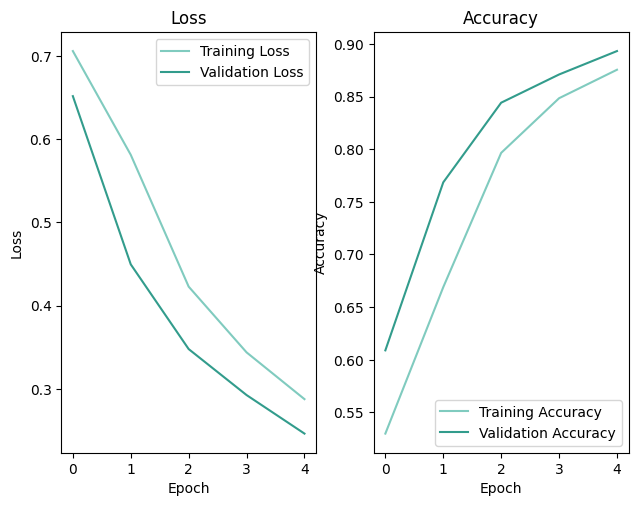

In [ ]:
#Plotting WELFake performance
plot_performance(history_WELFake)

451/451 [==============================] - 52s 114ms/step
Accuracy: 0.9220049916805324
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7418
           1       0.93      0.91      0.92      7006

    accuracy                           0.92     14424
   macro avg       0.92      0.92      0.92     14424
weighted avg       0.92      0.92      0.92     14424

CPU times: user 1min, sys: 6.09 s, total: 1min 6s
Wall time: 52.1 s


<Axes: xlabel='Predicted', ylabel='Actual'>

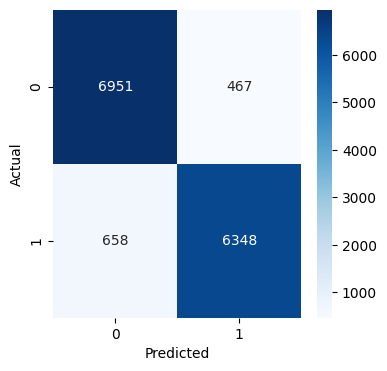

In [ ]:
%%time
#Plotting the performance on test set
y_pred = BERT_model_WELFake.predict(X_test)
y_pred = [1 if x[0] > 0.5 else 0 for x in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

confusion_matrix_m = confusion_matrix(y_test, y_pred)

confusion_matrix_m = pd.DataFrame(confusion_matrix_m, index=[0,1], columns=[0,1])
confusion_matrix_m.index.name = 'Actual'
confusion_matrix_m.columns.name = 'Predicted'

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix_m, cmap= "Blues",annot = True, fmt='')

### BERT - Saving models

In [ ]:
#Saving model - WELFake
BERT_model_WELFake.save(file_name_model_bert_WELFake)

### BERT - Loading models

In [ ]:
#Loading model - WELFake
BERT_model_WELFake = load_model(file_name_model_bert_WELFake, custom_objects={'KerasLayer':hub.KerasLayer, 'optimizer':optimizer}, compile=False)